In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive 
from scipy.stats import norm
from datetime import datetime as dt
import tensorflow as tf
#from pandas_datareader import data

## Usando feature-eng para crear un modelo exponencial de Covid-19

**Content**

Each row contains report from each region/location for each day
Each column represents the number of cases reported from each country/region


**Acknowledgements**

https://github.com/CSSEGISandData/COVID-19


In [36]:
covid19_data = pd.read_csv('https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
iniciopandemia = covid19_data["Date"].min()

covid19_data["dias"]=covid19_data["Date"]-iniciopandemia
covid19_data.head(100)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,dias
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0 days
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0 days
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0 days
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0 days
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0 days
...,...,...,...,...,...,...,...,...,...
95,NaN,Djibouti,11.8251,42.5903,2020-01-22,0,0,0,0 days
96,NaN,Dominican Republic,18.7357,-70.1627,2020-01-22,0,0,0,0 days
97,NaN,Ecuador,-1.8312,-78.1834,2020-01-22,0,0,0,0 days
98,NaN,Egypt,26.0000,30.0000,2020-01-22,0,0,0,0 days


In [5]:
covid19_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

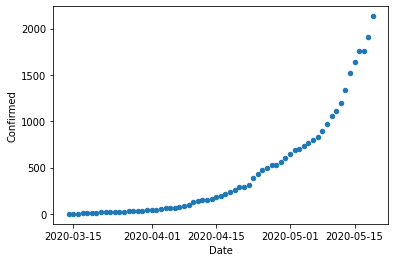

In [6]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

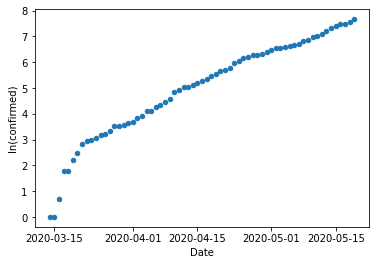

In [7]:
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")


In [8]:
GT_confirmed.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(confirmed)
13903,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0.000000
14168,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,0.000000
14433,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,0.693147
14698,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,1.791759
14963,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,1.791759
15228,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,2.197225
15493,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,2.484907
15758,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,2.833213
16023,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16288,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732


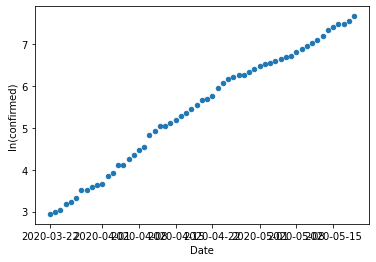

In [9]:
GT_confirmed_post24 = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
GT_confirmed_post24.plot.scatter(x = "Date",y="ln(confirmed)")

In [0]:
#import datetime as dt
#GT_confirmed['Date'] = pd.to_datetime(GT_confirmed['Date'])
#GT_confirmed['Date']=GT_confirmed['Date'].map(dt.datetime.toordinal)
#feature_cols = [tf.feature_column.numeric_column('Date') for "Date" in GT_confirmed]
#GT_confirmed.head()

codi19




In [15]:
GT_confirmed.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date                int64
Confirmed           int64
Deaths              int64
Recovered           int64
ln(confirmed)     float64
dtype: object